<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


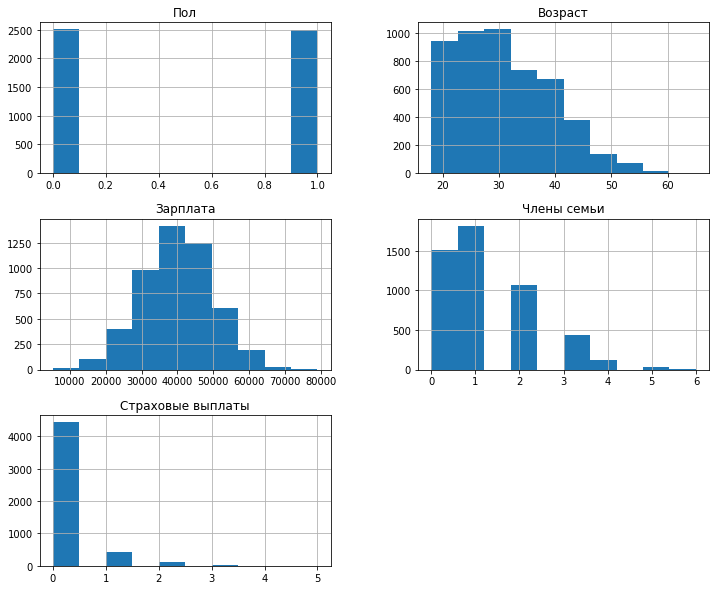

In [4]:
data.hist(figsize=(12,10));

Вывод: Данные были загружены и изучены, аномалий не обнаружено.

## Умножение матриц

In [5]:
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

In [6]:
np.random.seed(1000)
MATRIX = np.random.rand(4,4)
np.linalg.inv(MATRIX)

array([[-0.55585458,  1.33647574, -0.42477795,  0.75554256],
       [-1.91065117,  0.20726697,  0.9263718 ,  2.17256279],
       [ 0.55700057, -0.71303263, -0.04443859,  0.68445819],
       [ 2.18529575, -0.45575487,  0.44239795, -2.89118271]])

Создали матрицу и проверили, является ли она обратимой.

In [7]:
def LR_result(x, y):
    model = LinearRegression()
    model.fit(x, y)
    result = {'score': model.score(x, y),
              'w': model.coef_}
    return result

In [8]:
LR_result(features, target)

{'score': 0.4249455028666801,
 'w': array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])}

In [9]:
LR_result(features@MATRIX, target)

{'score': 0.424945502866679,
 'w': array([ 0.03306681, -0.03721905, -0.030333  ,  0.04027251])}

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
a_1 = XA((XA)^{T}XA)^{-1}(XA)^{T}y
$$
зная что, 
$$
(AB)^T=B^T A^T
$$
тогда, 
$$
a_1 = XA((XA)^{T}XA)^{-1}(XA)^{T}y = XA(A^{T}X^{T}XA)^{-1}A^{T}X^{T}y =  XAA^{-1}(A^{T}X^{T}X)^{-1}A^{T}X^{T}y
$$
зная что, 
$$
A A^{-1} = A^{-1} A = E
$$
и
$$
AE = EA = A
$$
тогда, 
$$
a_1 =  X(A^{T}X^{T}X)^{-1}A^{T}X^{T}y = X(X^{T}X)^{-1}(A^{T})^{-1}A^{T}X^{T}y = X(X^{T}X)^{-1}X^{T}y = Xw = a
$$

## Алгоритм преобразования

**Алгоритм**

Зная что умножение признаков на обратимую матрицу не влияет на качество линейной регрессии, создам алгоритм основывающийся на домножении признаков на эту матрицу. Он будет следующим:
1. Рандомное заполнение матрицы A 
2. Проверка матрицы на вырожденность
3. Домножение матрицы признаков на матрицу A 
4. Использование модели

**Обоснование**

В пунктее 2 я уже обосновал, почему умножение признаков на обратимую матрицу не влияет на качество линейной регрессии. разберу другие пункты алгоритма. Проверка матрицы на вырожденность будет осуществляться путем нахождения определителя, т. к. по свойству у вырожденных матриц определитель равен нулю. Также размер матрицы А будет NxN, где N - количество признаков регрессии. 

## Проверка алгоритма

Напишем функцию, которая создает матрицу B.

In [10]:
def matrix_creator(x):
    np.random.seed()
    MATRIX = np.random.rand(x.shape[1], x.shape[1])
    det = np.linalg.det(MATRIX)
    if det !=0:
        return x @ MATRIX

In [11]:
features_transform = matrix_creator(features)

In [12]:
LR_result(features, target)

{'score': 0.4249455028666801,
 'w': array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])}

In [13]:
LR_result(features_transform, target)

{'score': 0.4249455028666774,
 'w': array([-0.01138624, -0.01190952, -0.09584846,  0.11275963])}

Вывод: Данные в целости и сохранности, а качество не изменилось, значит алгоритм работает.

## Итоговый вывод

В ходе проекта было сделано:

1. Загружены и изучены данные.
2. Был дан ответ на вопрос о том, влияет ли домножении матрицы признаков на обратимую матрицу на качество линейной регресси. Ответ был обоснован путем преобразования матричных выражений.
3. Был предложен и обоснова алгоритм преобразования данных для решения задачи.
4. Алгоритм был успешно протестирован.